# CS690 Assignment 2
- Submitted by Aniruddh Pramod (210142)

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
merfish = sc.read_h5ad('Dataset1_MERFISH.h5ad')
osmfish = sc.read_h5ad('Dataset2_osmFISH.h5ad')

In [5]:
np.savetxt('data/merfish_Coordinates.txt', merfish.obsm['spatial'], delimiter='\t', fmt='%f')
np.savetxt('data/osmfish_Coordinates.txt', osmfish.obsm['spatial'], delimiter='\t', fmt='%f')

In [48]:
# Normalizing to median total counts
sc.pp.normalize_total(merfish)
sc.pp.normalize_total(osmfish)
# Logarithmize the data
sc.pp.log1p(merfish)
sc.pp.log1p(osmfish)

In [49]:
# sc.pp.highly_variable_genes(merfish, n_top_genes=2000)
# sc.pp.highly_variable_genes(osmfish, n_top_genes=2000)

In [52]:
# sc.pl.highly_variable_genes(merfish)

In [53]:
# sc.pl.highly_variable_genes(osmfish)

In [54]:
sc.tl.pca(merfish)
sc.tl.pca(osmfish)

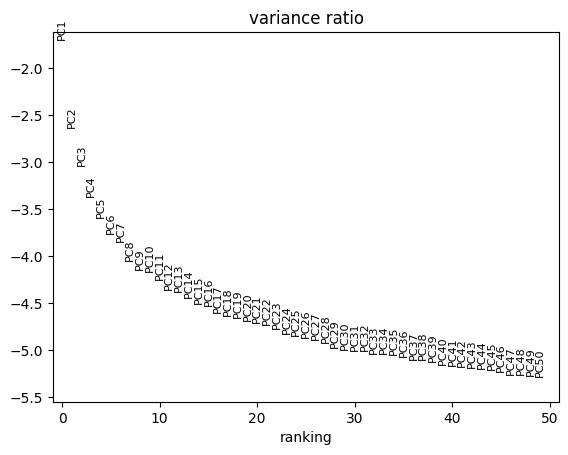

In [55]:
sc.pl.pca_variance_ratio(merfish, n_pcs=50, log=True)

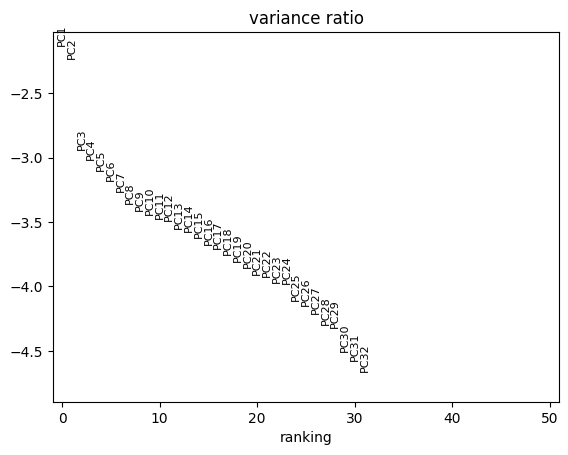

In [56]:
sc.pl.pca_variance_ratio(osmfish, n_pcs=50, log=True)

In [57]:
sc.pp.neighbors(merfish)
sc.pp.neighbors(osmfish)

In [58]:
sc.tl.umap(merfish)
sc.tl.umap(osmfish)

In [59]:
sc.tl.leiden(merfish, key_added="leiden_res0_2", resolution=0.2)
sc.tl.leiden(merfish, key_added="leiden_res0_3", resolution=0.3)
sc.tl.leiden(merfish, key_added="leiden_res0_4", resolution=0.4)
sc.tl.leiden(merfish, key_added="leiden_res0_5", resolution=0.5)

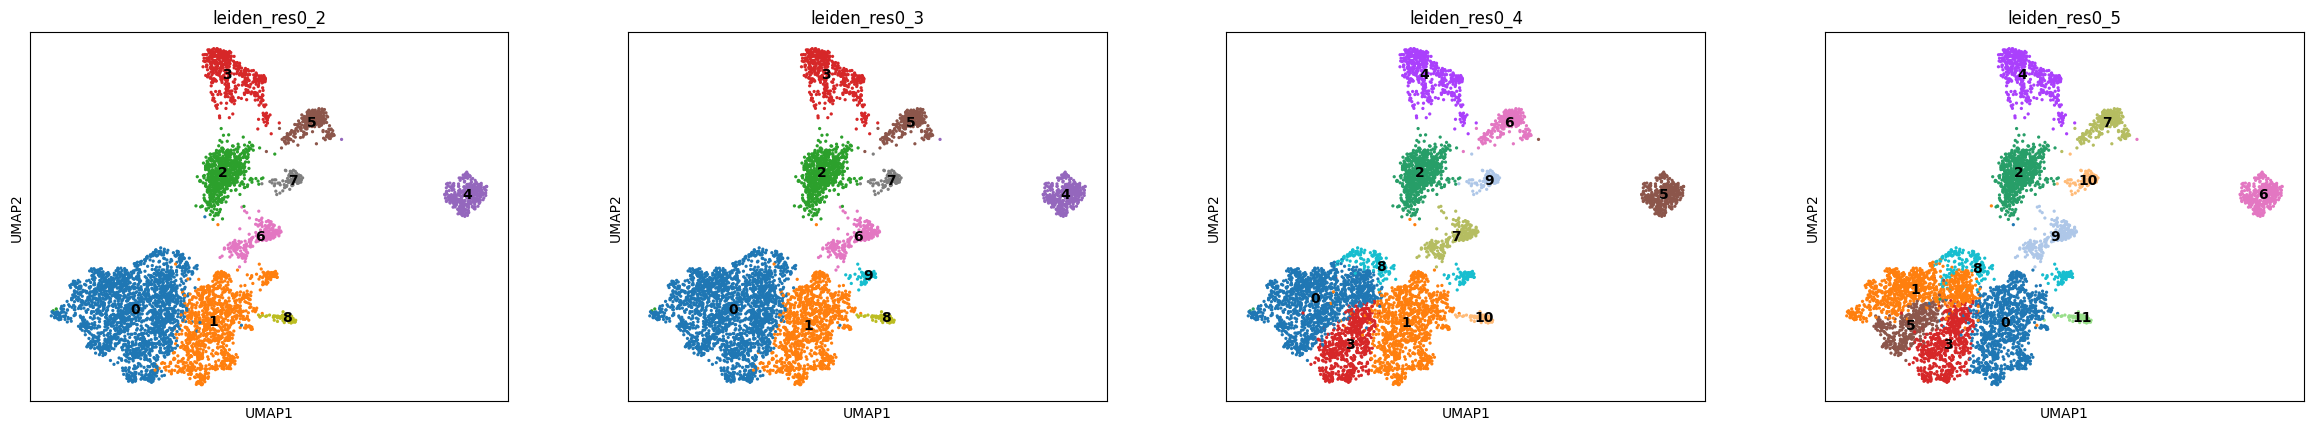

In [60]:
sc.pl.umap(
    merfish,
    color=["leiden_res0_2","leiden_res0_3","leiden_res0_4","leiden_res0_5"],
    legend_loc="on data",
)

We know that the number of clusters in this dataset are 8, so resolution 0.2 seems like the right choice

In [61]:
sc.tl.leiden(osmfish, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(osmfish, key_added="leiden_res0_8", resolution=0.8)
sc.tl.leiden(osmfish, key_added="leiden_res1", resolution=1)
sc.tl.leiden(osmfish, key_added="leiden_res1_2", resolution=1.2)
sc.tl.leiden(osmfish, key_added="leiden_res1_5", resolution=1.5)

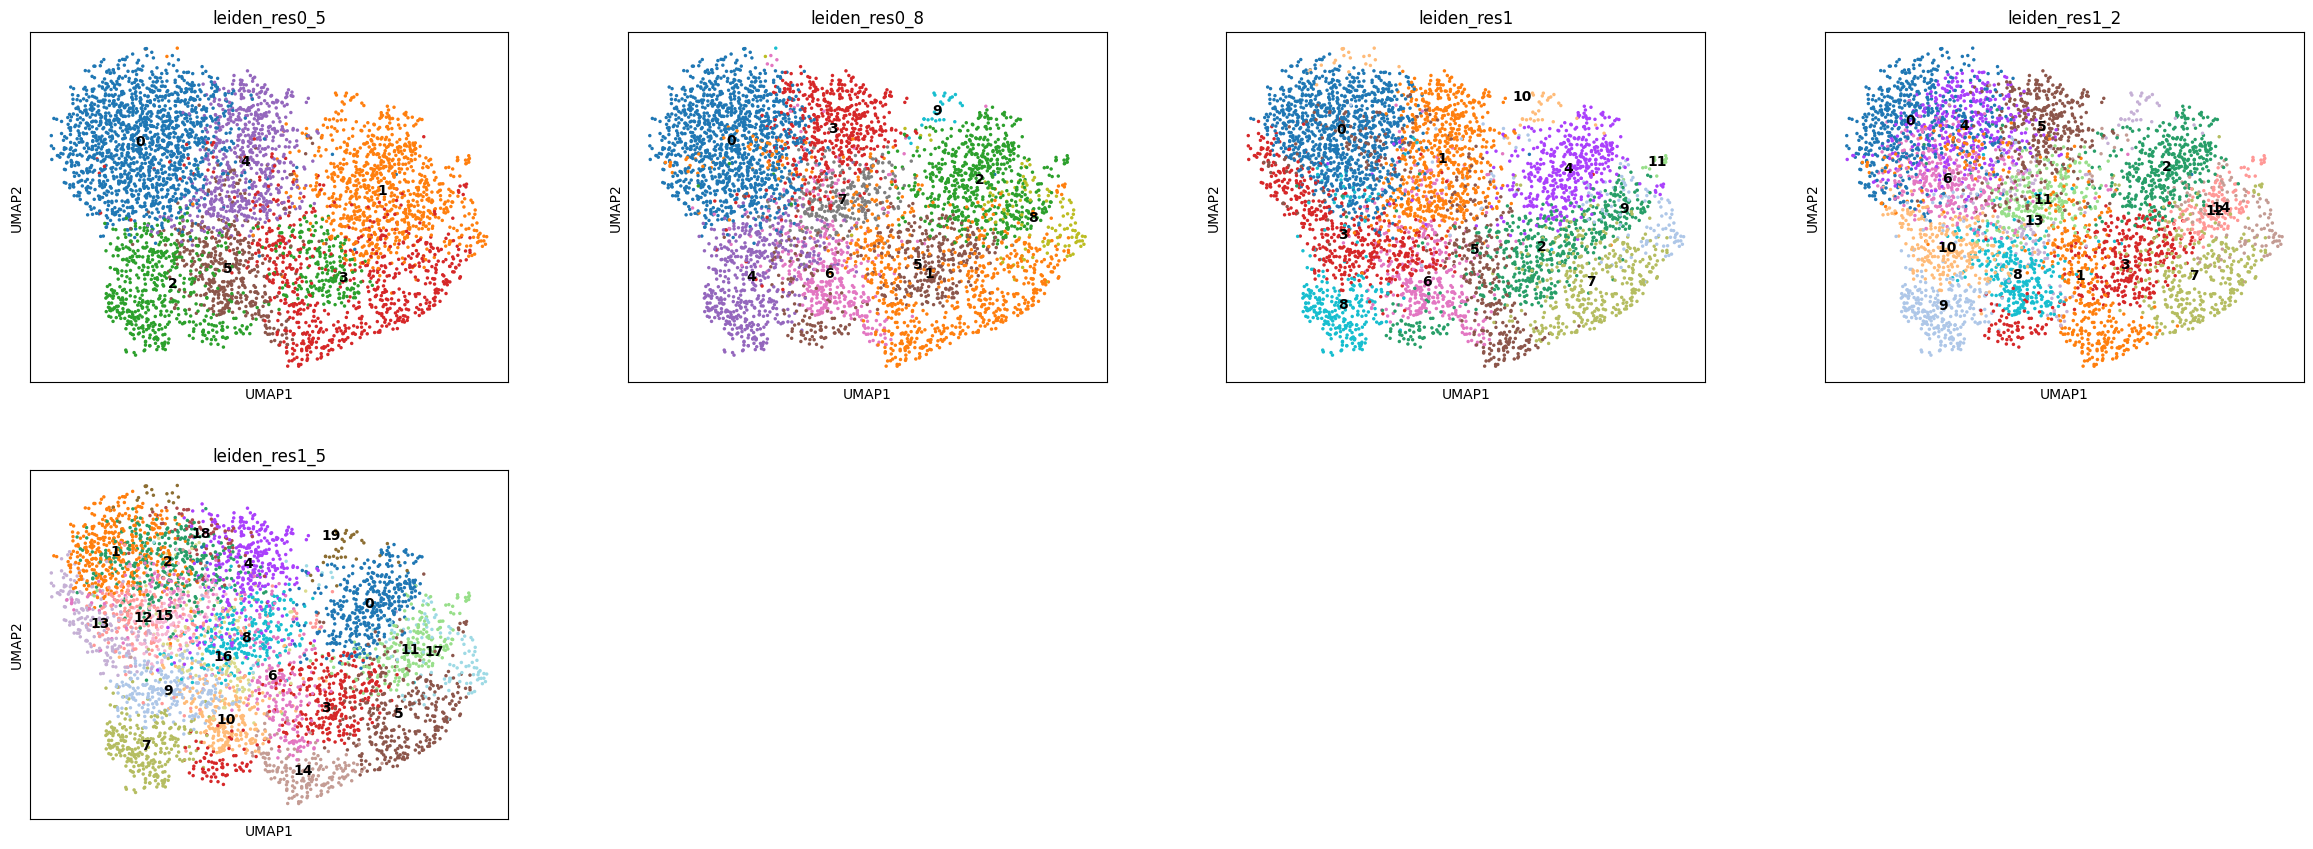

In [62]:
sc.pl.umap(
    osmfish,
    color=["leiden_res0_5","leiden_res0_8","leiden_res1","leiden_res1_2","leiden_res1_5"],
    legend_loc="on data",
)

Number of clusters is known to be 11, hence we use resolution 1

### Saving as txt files

In [72]:
# key = 'manual_celltype_annotation'
key1 = 'leiden_res0_2'
key2 = 'leiden_res1'
np.savetxt('data/merfish_CellTypeLabel.txt', merfish.obs[key1].values, fmt='%s')
np.savetxt('data/osmfish_CellTypeLabel.txt', osmfish.obs[key2].values, fmt='%s')

# Cell Typist Annotation

Trying out automated cell type annotation instead of the manual kind

In [1]:
import scanpy as sc
import anndata as ad

import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
merfish = sc.read_h5ad('Dataset1_MERFISH.h5ad')
osmfish = sc.read_h5ad('Dataset2_osmFISH.h5ad')

In [ ]:
np.savetxt('data/typistmerfish_Coordinates.txt', merfish.obsm['spatial'], delimiter='\t', fmt='%f')
np.savetxt('data/typistosmfish_Coordinates.txt', osmfish.obsm['spatial'], delimiter='\t', fmt='%f')

In [7]:
sc.pp.normalize_per_cell(merfish, counts_per_cell_after=10**4)
sc.pp.log1p(merfish)
sc.pp.normalize_per_cell(osmfish, counts_per_cell_after=10**4)
sc.pp.log1p(osmfish)

In [8]:
import celltypist
from celltypist import models

In [9]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(model=['Mouse_Whole_Brain.pkl'])

📂 Storing models in C:\Users\Aniruddh\.celltypist\data\models
💾 Total models to download: 1
⏩ Skipping [1/1]: Mouse_Whole_Brain.pkl (file exists)


In [11]:
model = models.Model.load(model = 'Mouse_Whole_Brain.pkl')
predictions_mer = celltypist.annotate(merfish, model = 'Mouse_Whole_Brain.pkl', majority_voting = True)

🔬 Input data has 5488 cells and 155 genes
🔗 Matching reference genes in the model
🧬 139 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [13]:
predictions_osm = celltypist.annotate(osmfish, model = 'Mouse_Whole_Brain.pkl', majority_voting = False)

🔬 Input data has 4839 cells and 33 genes
🔗 Matching reference genes in the model
🧬 29 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [15]:
predictions_mer.predicted_labels

,predicted_labels,over_clustering,majority_voting
Unnamed: 0,,,
-3033x2825,023 SUB-ProS Glut,6,106 PVpo-VMPO-MPN Hmx2 Gaba
-3027x2956,169 PAG-SC Pou4f1 Zic1 Glut,42,106 PVpo-VMPO-MPN Hmx2 Gaba
-3021x2962,173 PAG Pou4f2 Glut,42,106 PVpo-VMPO-MPN Hmx2 Gaba
-3017x2996,049 Lamp5 Gaba,59,199 PAG-MRN-RN Foxa2 Gaba
-3005x2878,074 MEA-BST Lhx6 Sp9 Gaba,2,173 PAG Pou4f2 Glut
...,...,...,...
-1431x4324,199 PAG-MRN-RN Foxa2 Gaba,45,199 PAG-MRN-RN Foxa2 Gaba
-1347x4422,049 Lamp5 Gaba,45,199 PAG-MRN-RN Foxa2 Gaba
-1365x4412,068 LSX Otx2 Gaba,60,068 LSX Otx2 Gaba


In [22]:
merfish_res = predictions_mer.to_adata()
submission_mer = merfish_res.obs[['majority_voting']]
osmfish_res = predictions_osm.to_adata()
submission_osm = osmfish_res.obs[['predicted_labels']]

In [24]:
np.savetxt('data/typistmerfish_CellTypeLabel.txt', submission_mer[['majority_voting']].values, fmt='%s')
np.savetxt('data/typistosmfish_CellTypeLabel.txt', submission_osm[['predicted_labels']].values, fmt='%s')